In [1]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define input shape
input_shape = (224, 224, 3)

In [5]:
train_path = '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train'
valid_path = '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Test'

In [6]:
# Load the pre-trained DenseNet121 model
densenet_base = DenseNet121(input_shape=input_shape, weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [7]:
densenet_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [8]:
# Freeze the layers of the pre-trained model
for layer in densenet_base.layers:
    layer.trainable = False

In [9]:
#glob() will tell us how many folders are present in the particular pathwithin the brackets
from glob import glob
folders = glob('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/*')
# edit this with actual path

In [10]:
folders

['/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/matiz blue',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/matiz black',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/rio red',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/matiz red',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/tiggo black',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/tiggo blue',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/rio blue',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/rio black',
 '/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train/tiggo red']

In [11]:
len(folders)

9

In [12]:
# Add custom layers for your classification task
x = Flatten()(densenet_base.output)
x = Dense(256, activation='relu')(x)
x = Dense(len(folders), activation='softmax')(x)

In [13]:
# Create the model
densenet_model = Model(inputs=densenet_base.input, outputs=x)

In [14]:
# Compile the model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
densenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Setting up the training data generator
train_datagen = ImageDataGenerator(rescale = 1./255, # Rescale pixel values to a range of [0, 1]
                                  shear_range = 0.2, # Randomly apply shearing transformation
                                  zoom_range = 0.2,  # Randomly apply zooming transformation
                                  horizontal_flip = True) # Randomly flip images horizontally
#Setting up the test data generator
#For the test data generator, only the rescale parameter is specified. This is because data augmentation techniques like shearing, zooming, and flipping should not be applied to the test dataset. The test dataset should remain as it is to evaluate the model's performance on real, unaltered data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
#make sure you provide the same target size as initiated for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2303 images belonging to 9 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 270 images belonging to 9 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r=densenet_model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/20
72/72 [==============================] - 768s 10s/step - loss: 8.4086 - accuracy: 0.5258 - val_loss: 0.5627 - val_accuracy: 0.8000
Epoch 2/20
72/72 [==============================] - 45s 628ms/step - loss: 0.4295 - accuracy: 0.8489 - val_loss: 0.3350 - val_accuracy: 0.8630
Epoch 3/20
72/72 [==============================] - 47s 653ms/step - loss: 0.2339 - accuracy: 0.9305 - val_loss: 0.2488 - val_accuracy: 0.9259
Epoch 4/20
72/72 [==============================] - 48s 670ms/step - loss: 0.1615 - accuracy: 0.9509 - val_loss: 0.1717 - val_accuracy: 0.9481
Epoch 5/20
72/72 [==============================] - 50s 699ms/step - loss: 0.1202 - accuracy: 0.9640 - val_loss: 0.1603 - val_accuracy: 0.9556
Epoch 6/20
72/72 [==============================] - 48s 666ms/step - loss: 0.0998 - accuracy: 0.9709 - val_loss: 0.1589 - val_accuracy: 0.9444
Epoch 7/20
72/72 [==============================] - 47s 650ms/step - loss: 0.1273 - accuracy: 0.9514 - val_loss: 0.1622 - val_accuracy: 0.9444


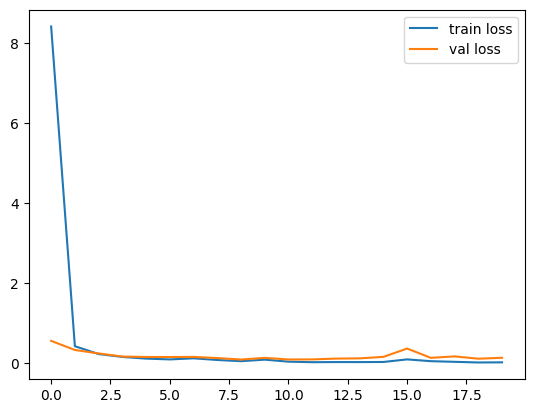

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file

from tensorflow.keras.models import load_model

# 'model' is your trained ResNet50 model above
densenet_model.save('DenseNet121Cus.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#The code is using a trained model (model) to make predictions on a dataset (test_set) using the predict method.

y_pred = densenet_model.predict(test_set)

9/9 [==============================] - 3s 173ms/step


In [25]:
y_pred


array([[1.3659814e-14, 5.3220351e-08, 2.7613036e-16, ..., 4.3926239e-12,
        9.9997532e-01, 8.2057556e-07],
       [7.6040824e-10, 1.3071182e-10, 7.9288170e-10, ..., 6.0373742e-07,
        6.0509000e-04, 9.9931741e-01],
       [1.6977264e-08, 7.7929850e-05, 3.3082519e-11, ..., 2.6952057e-07,
        1.4022286e-01, 8.3690395e-08],
       ...,
       [2.7739684e-04, 2.1276239e-10, 2.2814808e-09, ..., 5.1491137e-04,
        1.7184846e-08, 3.7290802e-09],
       [1.1194132e-05, 1.3889137e-07, 1.3541370e-02, ..., 1.1995899e-10,
        6.5678400e-09, 2.3799899e-03],
       [1.7071594e-05, 3.4706707e-10, 3.4996447e-11, ..., 8.0054915e-01,
        3.2245840e-05, 9.3982294e-07]], dtype=float32)

In [26]:
#you're using the NumPy library in Python to work with an array called y_pred and you want to find the index (or class) with the highest predicted value along axis 1.
import numpy as np

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([7, 8, 4, 0, 0, 5, 3, 4, 5, 2, 1, 1, 5, 3, 3, 0, 1, 7, 8, 1, 6, 1,
       3, 6, 8, 0, 0, 0, 6, 3, 2, 6, 7, 0, 1, 8, 4, 6, 6, 2, 2, 5, 1, 2,
       7, 2, 5, 2, 3, 8, 4, 8, 6, 3, 3, 2, 6, 5, 4, 8, 4, 4, 3, 0, 5, 7,
       5, 7, 6, 4, 0, 2, 6, 7, 6, 5, 7, 0, 7, 1, 2, 0, 3, 6, 3, 5, 7, 5,
       8, 4, 0, 3, 0, 1, 1, 7, 8, 4, 3, 7, 7, 2, 1, 5, 2, 8, 3, 8, 6, 5,
       0, 5, 0, 8, 6, 8, 5, 1, 3, 3, 3, 4, 7, 2, 1, 5, 8, 8, 1, 5, 2, 8,
       7, 2, 7, 2, 3, 0, 6, 3, 4, 1, 0, 4, 5, 8, 0, 2, 4, 7, 1, 7, 3, 8,
       4, 2, 6, 1, 0, 6, 7, 7, 8, 0, 2, 1, 1, 1, 5, 3, 6, 7, 3, 0, 5, 0,
       8, 7, 3, 8, 4, 5, 3, 2, 3, 8, 1, 7, 4, 8, 4, 6, 0, 7, 2, 8, 4, 1,
       3, 6, 5, 0, 2, 2, 2, 0, 5, 0, 5, 1, 8, 5, 1, 3, 6, 0, 6, 6, 4, 0,
       8, 6, 1, 8, 7, 3, 7, 3, 4, 1, 4, 8, 3, 5, 2, 3, 3, 5, 7, 4, 4, 4,
       6, 2, 7, 3, 8, 8, 2, 0, 2, 2, 7, 5, 0, 4, 7, 4, 2, 0, 7, 0, 3, 4,
       1, 0, 5, 3, 5, 6])

In [28]:
#This module is used for loading pre-trained or saved Keras models.

from tensorflow.keras.models import load_model

#This module is used for image preprocessing and augmentation when working with image data.
#It provides functions and classes to load, preprocess, and augment images before feeding them into deep learning models built using TensorFlow's Keras API.
#Common functions include load_img, img_to_array, array_to_img, etc., which help in loading and converting images to NumPy arrays suitable for feeding into a neural network.

from tensorflow.keras.preprocessing import image

In [31]:
# Load a pre-trained model

model = load_model('DenseNet121Cus.h5')

#we can use the loaded model for inference or further training

In [32]:
# To load an image file from the path within brackets and resize it to the target size(load_img function from TensorFlow's Keras preprocessing module )
img=image.load_img('/content/drive/MyDrive/Deep Learning/CarDataset/CarDataset/Test/matiz black/000013.jpg',target_size=(224,224))

In [33]:
image

<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/preprocessing/image/__init__.py'>

In [34]:
# image.img_to_array(img): This function takes an image object (typically loaded using image.load_img) as input and converts it into a NumPy array.
# variable x will contain a NumPy array representing the image.
x=image.img_to_array(img)

# print the x
x

array([[[115., 124.,  71.],
        [133., 150.,  95.],
        [ 91., 112.,  55.],
        ...,
        [177., 210., 253.],
        [177., 210., 253.],
        [177., 210., 253.]],

       [[ 34.,  48.,   0.],
        [ 53.,  71.,  21.],
        [ 52.,  73.,  17.],
        ...,
        [178., 211., 254.],
        [178., 211., 254.],
        [178., 211., 254.]],

       [[ 39.,  56.,  14.],
        [ 87., 106.,  61.],
        [ 49.,  67.,  15.],
        ...,
        [179., 212., 255.],
        [179., 212., 255.],
        [179., 212., 255.]],

       ...,

       [[223., 197., 180.],
        [222., 196., 179.],
        [210., 184., 167.],
        ...,
        [174., 153., 136.],
        [210., 189., 172.],
        [178., 157., 140.]],

       [[212., 186., 169.],
        [225., 199., 182.],
        [218., 192., 175.],
        ...,
        [194., 173., 156.],
        [195., 174., 157.],
        [190., 169., 152.]],

       [[212., 186., 169.],
        [213., 187., 170.],
        [209., 1

In [35]:
#The x.shape attribute is used to determine the shape or dimensions of a NumPy array
#The shape typically consists of three values: (height, width, channels) for a color image or just (height, width) for a grayscale image.
#If it's a color image, the shape will be something like (224, 224, 3), indicating a 224x224 image with 3 channels (Red, Green, Blue).
#If grayscale image output(224,224) with 1 channel

x.shape

(224, 224, 3)

In [36]:
# previously we have done rescaling for all the test dataset images.so,we have to do to the new images also
x=x/255
# print x
x

array([[[0.4509804 , 0.4862745 , 0.2784314 ],
        [0.52156866, 0.5882353 , 0.37254903],
        [0.35686275, 0.4392157 , 0.21568628],
        ...,
        [0.69411767, 0.8235294 , 0.99215686],
        [0.69411767, 0.8235294 , 0.99215686],
        [0.69411767, 0.8235294 , 0.99215686]],

       [[0.13333334, 0.1882353 , 0.        ],
        [0.20784314, 0.2784314 , 0.08235294],
        [0.20392157, 0.28627452, 0.06666667],
        ...,
        [0.69803923, 0.827451  , 0.99607843],
        [0.69803923, 0.827451  , 0.99607843],
        [0.69803923, 0.827451  , 0.99607843]],

       [[0.15294118, 0.21960784, 0.05490196],
        [0.34117648, 0.41568628, 0.23921569],
        [0.19215687, 0.2627451 , 0.05882353],
        ...,
        [0.7019608 , 0.83137256, 1.        ],
        [0.7019608 , 0.83137256, 1.        ],
        [0.7019608 , 0.83137256, 1.        ]],

       ...,

       [[0.8745098 , 0.77254903, 0.7058824 ],
        [0.87058824, 0.76862746, 0.7019608 ],
        [0.8235294 , 0

In [37]:
#preparing the image data for use with a deep learning model, likely one that uses the Keras framework.
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape                # to check the shape of the preprocessed image data.

#x = np.expand_dims(x, axis=0): This line uses NumPy's np.expand_dims function to add an extra dimension to your image data x. This is often done to convert a single image (which is typically 3D) into a batch of images with a batch size of 1. The axis=0 argument indicates that you want to add the new dimension as the first dimension. After this line, x will become a 4D NumPy array.

#img_data = preprocess_input(x): This line seems to be using a preprocessing function called preprocess_input on your image data x. The specific preprocessing steps depend on the model and framework you are using. It's common to apply preprocessing to normalize the pixel values or perform other operations required by the model. The result is stored in the variable img_data.

#Finally, img_data.shape is used to check the shape of the preprocessed image data. The shape will depend on the preprocessing steps applied, but it will typically be something like (1, height, width, channels) if you expanded a single image into a batch with a batch size of 1.

(1, 224, 224, 3)

In [38]:
#used to make predictions on the input data (img_data) using a pre-trained deep learning model.
model.predict(img_data)

# model: This should be a pre-trained deep learning model that you have loaded or created earlier using TensorFlow's Keras API. The model is capable of performing various tasks such as image classification, object detection, etc., depending on how it was trained.

 #   img_data: This is the input data, typically a preprocessed image or a batch of preprocessed images, that you want to pass to the model for prediction. In your case, it seems to be the result of preprocessing a single image and expanding its dimensions, so it's a 4D NumPy array.

# When you call model.predict(img_data), the model uses its learned weights and architecture to make predictions based on the input data. The output of this operation will be the model's predictions for the provided input data. The shape and content of the predictions will depend on the specific model and task you are working on.

# For example, if you are using an image classification model, the output might be a probability distribution over classes, indicating the likelihood of each class for the given input. You can then extract information from the predictions, such as the predicted class label or class probabilities, to interpret the model's output.


1/1 [==============================] - 3s 3s/step


array([[1.21508576e-01, 1.44088315e-03, 8.75362847e-03, 7.99500048e-01,
        1.14536248e-02, 3.31129530e-04, 5.12409806e-02, 2.96841841e-03,
        2.80263321e-03]], dtype=float32)

In [39]:
# used to obtain the predicted class labels from the output of a deep learning model for a given input (img_data).
a=np.argmax(model.predict(img_data), axis=1)

# model.predict(img_data): This part of the code uses the pre-trained deep learning model (model) to make predictions on the input data (img_data). The output of this operation is a prediction, which typically includes a probability distribution over classes for each input.

 #   np.argmax(...): After making predictions, np.argmax is used to find the index (or class label) corresponding to the highest predicted probability for each input in the batch. The axis=1 argument specifies that the maximum value should be found along the second axis, which corresponds to the classes.

  #  a = ...: The result of np.argmax(model.predict(img_data), axis=1) is assigned to the variable a, so a will contain an array of predicted class labels for the inputs in img_data.


1/1 [==============================] - 0s 47ms/step


In [40]:
# print a(a will be an array of these predicted class labels)
a

array([3])